# About this Notebook

In this notebook we are going to use several well-known models to classify using scikit-learn.

## Iris Dataset

First, we are going to solve the Iris Dataset, it is a classic one. 

The target is to identify the iris from the dimension of the flower. 

<img src="https://machinelearninghd.com/wp-content/uploads/2021/03/iris-dataset.png">

In [40]:
from sklearn import datasets

iris = datasets.load_iris()

In [41]:
y = iris.target
X = iris.data[:,:2]

In [42]:
import pandas as pd

In [43]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

We divide in train and test

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Now, we are going to use different classic algorithms.

## Lineal Classification

First, we are going to use a Linear Classifier.

In [45]:
from sklearn.linear_model import SGDClassifier

model = SGDClassifier(max_iter=100)
model.fit(X_train, y_train)

SGDClassifier(max_iter=100)

In [46]:
predict = model.predict(X_test)

In [47]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [48]:
accuracy_score(predict, y_test)

0.7111111111111111

It is able to classify with great results.

We are going to visualize the decision bounds.

In [49]:
from sklearn.inspection import DecisionBoundaryDisplay
import matplotlib.pyplot as plt

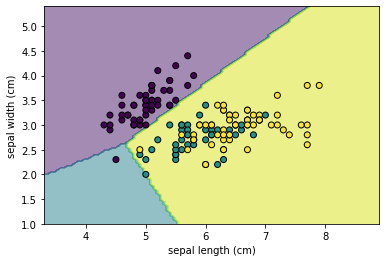

In [50]:
disp = DecisionBoundaryDisplay.from_estimator(
    model,
    X[:,:2],
    ax=plt.gca(),
    response_method="predict",
    xlabel=iris.feature_names[0], ylabel=iris.feature_names[1], alpha=0.5
)
disp.ax_.scatter(X[:, 0], X[:, 1], c=iris.target, edgecolor="k")

We can see that the space is linearly divided in 3, to classify each instance.

We have use only two variables to visualize, with all four we achieve a better results. 

**Task: Modify the code to use the 4 attributes, and check the accuracy.**

In [51]:
predict = model.predict(X_test)

In [52]:
cross_val_score(model, X, y, cv=5).mean()

0.6666666666666666

## K-Nearest Neighborhood

This algorithm allow us to classify considering the class of the nearest instances.

In [53]:

from sklearn.neighbors import KNeighborsClassifier

In [54]:
knn = KNeighborsClassifier(n_neighbors=3)

### Important: Data must be normalize

In [55]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [56]:
model_knn = Pipeline([
            ("scaler", StandardScaler()),
            ("knn", knn)])

In [57]:
model_knn.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=3))])

In [58]:
predict = model_knn.predict(X_test)

In [59]:
accuracy_score(predict, y_test)

0.8

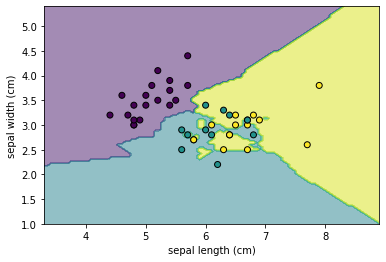

In [60]:
disp = DecisionBoundaryDisplay.from_estimator(
    model_knn,
    X[:,:2],
    ax=plt.gca(),
    response_method="predict",
    xlabel=iris.feature_names[0], ylabel=iris.feature_names[1], alpha=0.5
)
disp.ax_.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolor="k")

In this case, the region is grouping around each solution.

**Task: Apply with several neighborhood.**

In [61]:
cross_val_score(model_knn, X, y, cv=5).mean()

0.7466666666666667

## Support Vector Machine

SVM is a very popular classifier, that divide the space.

<img src="https://miro.medium.com/max/1200/1*06GSco3ItM3gwW2scY6Tmg.png" width="50%">

In [62]:
from sklearn.svm import LinearSVC

In [63]:
svc = LinearSVC()

In [64]:
model_svc = Pipeline([("scale", StandardScaler()), ("svc", svc)])

In [65]:
model_svc.fit(X_train, y_train)

Pipeline(steps=[('scale', StandardScaler()), ('svc', LinearSVC())])

In [66]:
predict = model_svc.predict(X_test)
accuracy_score(predict, y_test)

0.8222222222222222

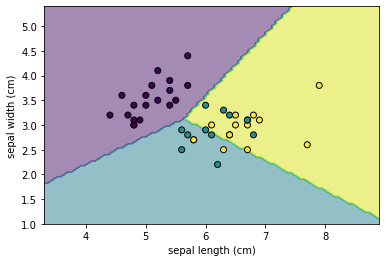

In [67]:
disp = DecisionBoundaryDisplay.from_estimator(
    model_svc,
    X[:,:2],
    response_method="predict",
    xlabel=iris.feature_names[0], ylabel=iris.feature_names[1], alpha=0.5
)
disp.ax_.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolor="k")

In [68]:
cross_val_score(model_svc, X, y, cv=5).mean()

0.8066666666666666

## Titanic Dataset

We are going to use another datasets, detection of Titanic.

In [69]:
data = pd.read_csv("titanic.csv").dropna()

In [70]:
data.shape

(183, 12)

In [71]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


In [72]:
y = data['Survived']

In [73]:
X = data.drop(['Survived', 'Cabin', 'PassengerId', 'Name', 'Ticket'], axis=1)

In [74]:
import seaborn as sns
disp = sns.countplot(x = 'Survived', hue = 'Sex', palette = 'Set1', data = data)
disp.set(title = 'Passenger status (Survived/Died) against Passenger Class', 
       xlabel = 'Passenger Class', ylabel = 'Total')
plt.show()

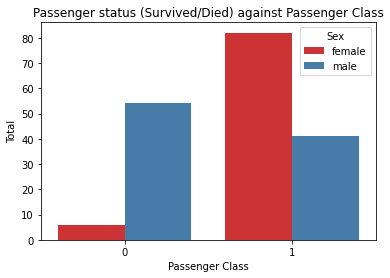

In [75]:
from sklearn.preprocessing import LabelEncoder

In [76]:
labels_t = {}

for col in ['Sex', 'Embarked']:
    labels_t[col] = LabelEncoder().fit(X[col])
    X[col] = labels_t[col].transform(X[col])

NameError: name 'LabelEncoder' is not defined

In [ ]:
X.info()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

## Decision Tree

The decision tree are one of the most intuitive models to predict a category. The idea is to automatically create a decision tree that, for each instance, in function of its attributes, a specific category is assigned.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model_tree = DecisionTreeClassifier(max_depth=3)

In [ ]:
model_tree.fit(X_train, y_train)

We are going to visualize it.

In [ ]:

from sklearn import tree

In [ ]:
tree.plot_tree(model_tree)
plt.show()

In [ ]:
plt.figure(figsize=(50,50))
tree.plot_tree(model_tree, feature_names=X_train.columns)
plt.show()

In [ ]:
cross_val_score(model_tree, X, y, cv=5).mean()

## Ensemble models and Random Forest

In this example, we are going to use Ensemble Model, Random Forest.

<img src="https://miro.medium.com/max/1482/0*Srg7htj4TOMP5ldX.png">

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model_rf = RandomForestClassifier(n_estimators=50) # Limit the number of trees

In [ ]:
cross_val_score(model_rf, X, y, cv=5).mean()

# Task: Tackle 

We have a list of Seeds for Pumpins, we want to classify the Class from the Features. Test the different models compared, using cross_validation, and get the best models.

In [ ]:
from scipy.io import arff
import pandas as pd

data = arff.loadarff('Pumpkin_Seeds_Dataset.arff')
seeds = pd.DataFrame(data[0])

In [ ]:
seeds.head()

In [ ]:
target_labels = LabelEncoder().fit(seeds['Class'])

In [ ]:
y = target_labels.transform(seeds['Class'])
X = seeds.drop(['Class'], axis=1)